# Create a map with GeoPandas

In [18]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib_scalebar.scalebar import ScaleBar


## Load data

In [2]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

west_africa = [
    "Benin", "Burkina Faso", "Cabo Verde", "Côte d'Ivoire", "Gambia", "Ghana",
    "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger",
    "Nigeria", "Senegal", "Sierra Leone", "Togo"
]

# Filter for West African Countries
wa_gdf = gdf[gdf["name"].isin(west_africa)]

# Convert to a Mercator CRS for better visualization
wa_gdf = wa_gdf.to_crs(epsg=3857)

cities_path = gpd.datasets.get_path("naturalearth_cities")
cities = gpd.read_file(cities_path).to_crs(epsg=3857)

wa_cities = cities.clip(wa_gdf)

## Plot map
### North Arrow Image Source: [Compass icons created by graphicmall - Flaticon](https://www.flaticon.com/free-icons/compass)

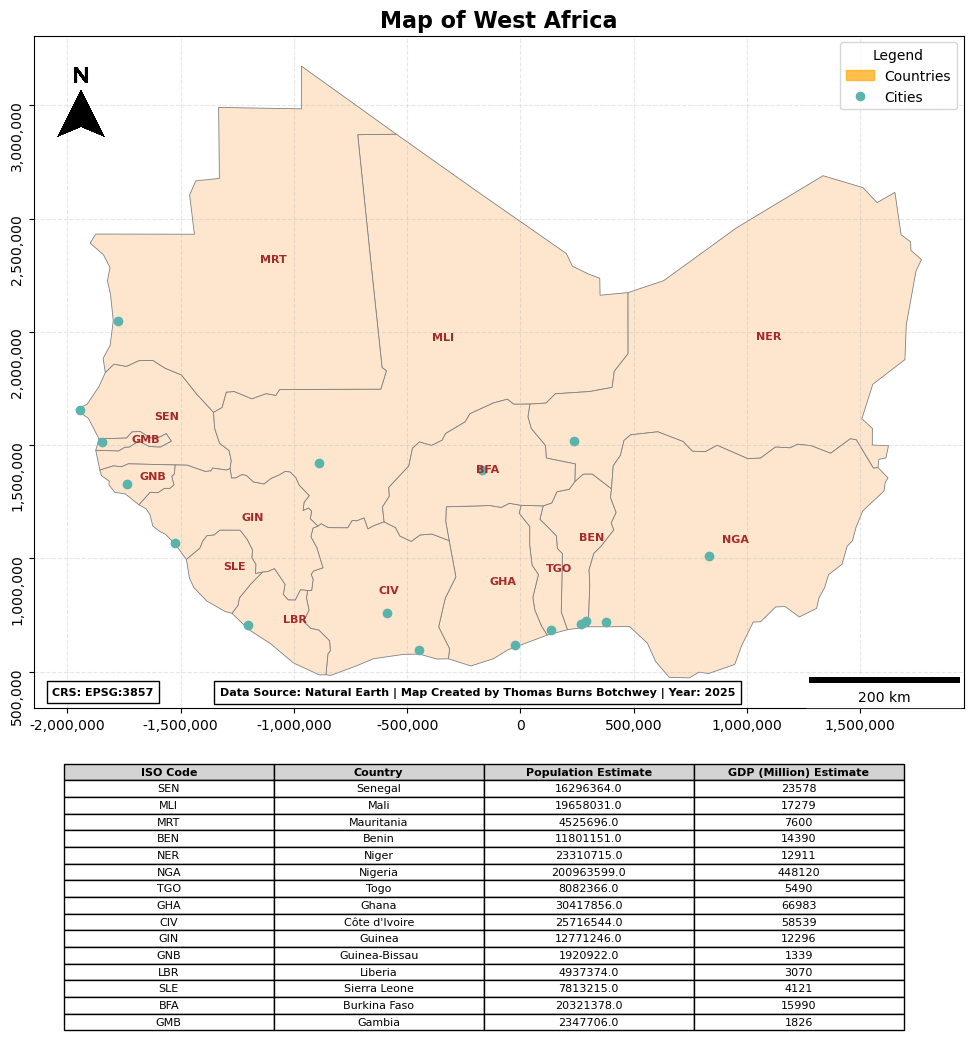

In [ ]:
fig, ax = plt.subplots(figsize=(12, 14))
wa_plot = wa_gdf.plot(
    ax=ax,
    color="#fee6ce",
    edgecolor="gray", 
    linewidth=0.6,
)

# Adding the cities layer
cities_plot = wa_cities.plot(ax=wa_plot, label="Cities", color="#5ab4ac")


# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

# Customize axes labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _ : f"{int(x):,}"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _ : f"{int(y):,}"))
ax.yaxis.set_tick_params(rotation=90)

# Legend
country_legend = mpatches.Patch(color="orange", label="Countries", alpha=0.7)
cities_legend = plt.Line2D([0], [0], marker="o", color="white", markerfacecolor="#5ab4ac", markersize=8, label="Cities")

ax.legend(handles=[country_legend, cities_legend], loc="upper right", title="Legend")

# Scalebar
scalebar = ScaleBar(0.3, location="lower right")
ax.add_artist(scalebar)

# Convert north arrow image to an OffsetImage
north_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow = mpimg.imread(north_arrow_image)
image = OffsetImage(north_arrow, zoom=0.1)

# Use annotation box to position the image
ab = AnnotationBbox(image, xy=(0.05, 0.9), frameon=False, xycoords='axes fraction')

# Add north arrow to the plot
ax.add_artist(ab)

# Adding text: country names
for idx, row in wa_gdf.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x=x, y=y, 
        s=row["iso_a3"],
        fontsize=8,
        fontweight=700,
        color="brown"
        )


# Add title
ax.set_title("Map of West Africa", fontsize=16, fontweight=700)


# Table
# create a new axis below the main map for the table
table_ax = fig.add_axes([0.15, 0.02, 0.7, 0.2])
table_ax.axis("off")

# select the columns
table_data = wa_gdf[["iso_a3", "name", "pop_est", "gdp_md_est"]].values.tolist()
column_labels = ["ISO Code", "Country", "Population Estimate", "GDP (Million) Estimate"]

# Add the table
table = table_ax.table(
    cellText=table_data,
    colLabels=column_labels,
    loc="center",
    cellLoc="center",
    colColours=["lightgray"] * len(column_labels)
)

table.auto_set_font_size(False)
table.set_fontsize(8)

# make row headers bold
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight="bold")


# CRS Information
crs_info = f"CRS: {wa_gdf.crs}"
ax.text(
    x=0.02, y=0.02, 
    s=crs_info, fontsize=8, 
    fontweight=700, 
    transform=ax.transAxes,
    bbox=dict(facecolor="white")
    )

# Bibliographic Information
bibliographic_info = "Data Source: Natural Earth | Map Created by Thomas Burns Botchwey | Year: 2025"
ax.text(
    x=0.2, y=0.02, 
    s=bibliographic_info, fontsize=8, 
    fontweight=700, 
    transform=ax.transAxes,
    bbox=dict(facecolor="white")
    )

# Saving the map
export_path = os.path.join(os.getcwd(), "output", "04_output", "map_of_west_africa.png")
plt.savefig(export_path, dpi=300, bbox_inches="tight")

plt.show()